<a href="https://colab.research.google.com/github/debangana97/GRIP-Feb-21/blob/main/Cluster_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mounting Google drive to import the dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Iris.csv')
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [11]:
#data['Species']
x = data.iloc[:, [1,2,3,4]].values
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

**Since there are different kinds of Species depending on the four characteristics so we perform Cluster Analysis to identify the clusters of Species. Cluster Analysis is an Unsupervised machine learning algorithm which allocates the datapoints into mutually exclusive clusters based on certain features.**

In [12]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no missing values in the Iris dataset.

### Using the elbow method to find the optimal number of clusters

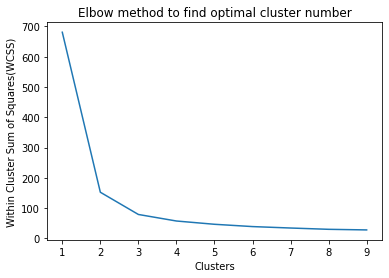

In [17]:
from sklearn.cluster import KMeans
WCSS = []   #WCSS stands for Within Cluster Sum of Squares
for i in range(1,10):      #the for loop calculates the WCSS for each no.of cluster from 1 to 9 and at each iteration creates a K-Means algorithm for i
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter = 300, n_init = 10, random_state=0)
  kmeans.fit(x)
  WCSS.append(kmeans.inertia_)
plt.plot(range(1,10), WCSS)
plt.title('Elbow method to find optimal cluster number')
plt.xlabel('Clusters')
plt.ylabel('Within Cluster Sum of Squares(WCSS)')
plt.show()

The elbow method clearly justifies its name. As can be seen from the graph that the optimum number of clusters = 3, because after 3 the WCSS becomes more or less constant so optimum is 3.

### Training the K-Means Cluster model

In [18]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter = 300, n_init = 10, random_state=0)
y_kmeans = kmeans.fit_predict(x)   #not only fits the model to the data but also returns a dependent variable containing an of numbers where each number corresponds a particular cluster
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


The output obtained implies that the first flower belongs to the second category of IRIS, so does the second flower. Similarly, the last flower belongs to the 3rd category and the one before that belongs to the first.

### Visualizing the clusters formed

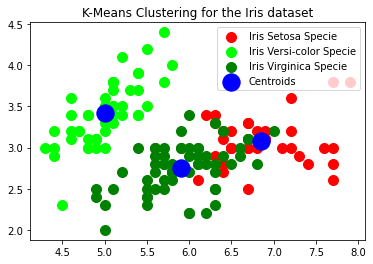

In [19]:
#Creating the clusters
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s=100, c='red', label='Iris Setosa Specie')

plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s=100, c='lime', label='Iris Versi-color Specie')

plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s=100, c='green', label='Iris Virginica Specie')

#Creating the centroids for each cluster
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='blue', label = 'Centroids')

plt.legend()

plt.title('K-Means Clustering for the Iris dataset')
plt.show()

Therefore, there are distinct **three clusters** for the IRIS dataset based on the four given characteristics. 